In [96]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

sym.init_printing()

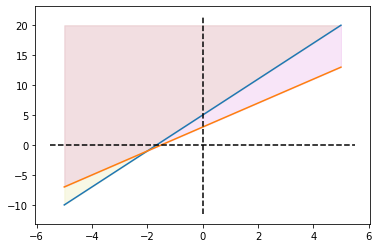

In [158]:
def horizontal_line_constant(start_y, end_y, inequality):
    horizontal_line = 0
    if inequality == '<' or inequality == '<=':
        horizontal_line = start_y if start_y < end_y else end_y

    if inequality == '>' or inequality == '>=':
        horizontal_line = start_y if start_y > end_y else end_y

    return horizontal_line


def horizontal_line_max_constant(start_y1, end_y1, start_y2, end_y2, inequality):
    horizontal_line = 0

    if inequality == '<' or inequality == '<=':
        horizontal_line = start_y1 if start_y1 < end_y1 else end_y1
        horizontal_line = start_y2 if start_y2 < horizontal_line else horizontal_line
        horizontal_line = end_y2 if end_y2 < horizontal_line else horizontal_line

    if inequality == '>' or inequality == '>=':
        horizontal_line = start_y1 if start_y1 > end_y1 else end_y1
        horizontal_line = start_y2 if start_y2 > horizontal_line else horizontal_line
        horizontal_line = end_y2 if end_y2 > horizontal_line else horizontal_line

    return horizontal_line


def draw_grid():
    axis = plt.gca()
    plt.plot(axis.get_xlim(), [0, 0], 'k--')
    plt.plot([0, 0], axis.get_ylim(), 'k--')


def graph_line_inequality(lines, inequality):
    fig, ax = plt.subplots()
    x = np.linspace(-5, 5, 101)
    colors = ['y', 'm']
    complete_lines = []

    for i in range(0, len(lines)):
        m, b = lines[i]
        y = m * x + b

        new_line = {
            'x_coords': x,
            'y_coords': y,
            'start_y': y[0],
            'end_y': y[-1],
            'inequality': inequality[i],
            'color': colors[i]
        }

        complete_lines.append(new_line)
        plt.plot(x, y)

    for i in range(0, len(complete_lines)):
        next_line = i + 1

        if next_line >= len(complete_lines):
            next_line = 0

        horizontal_line = 0
        if len(complete_lines) > 1:
            horizontal_line = horizontal_line_max_constant(complete_lines[i]['start_y'], complete_lines[i]['end_y'],
                                                           complete_lines[next_line]['start_y'],
                                                           complete_lines[next_line]['end_y'],
                                                           complete_lines[i]['inequality'])
        if len(complete_lines) == 1:
            horizontal_line = horizontal_line_constant(complete_lines[i]['start_y'], complete_lines[i]['end_y'],
                                                       complete_lines[i]['inequality'])

        ax.fill_between(complete_lines[i]['x_coords'], complete_lines[i]['y_coords'], horizontal_line,
                        color=complete_lines[i]['color'], alpha=.1)

    draw_grid()
    plt.show()


# graph_line_inequality([[2, 3]], ['>'])
# graph_line_inequality([[2, 3], [3 / 1, 5]], ['<', '>'])
graph_line_inequality([[3 / 1, 5], [2, 3]], ['>', '>'])